# Experiment와 Survey에서의 스피트 데이팅 분석

# 🔎 주제 소개

> **<목표>**  
스피드 데이트 후에 다음 만남여부를 예측하고
매칭 성공에 영향을 주는 요소를 데이터를 통해 찾는다.

```
데이터 및 과제 정보
https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment
```

<hr style="height:5px;border:none;" />

# 목차

## 1 라이브러리 호출
## 2 데이터 확인 및 전처리
### 2.1 데이터 확인
### 2.2 데이터를 통한 스피드 데이팅 방식 도출
### 2.3 결측치 처리
### 2.4 이상치 처리
### 2.5 범주형 변수 제거
### 2.6 변수 생성
### 2.7 변수 제거
## 3 탐색적 데이터 분석(EDA)을 통한 소개팅 성공요인 분석
## 4 모델링

<hr style="height:5px;border:none;" />

## 1 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
from matplotlib import rc # 한글 깨짐 해결
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
import warnings # 경고 무시
warnings.filterwarnings('ignore')

## 2 데이터 확인 및 전처리

### 2.1 전체 데이터 확인

In [4]:
data = pd.read_csv('./data_speed_dating/Speed Dating Data.csv', encoding='cp949')

In [5]:
data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [6]:
data.info() # 8378행, 195열로 구성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


데이터 구조 파악

- 8378행, 195열로 구성된 정형 데이터 
- 주요 데이터 속성 파악

iid : 참가자의 고유 번호  
round : 스피드 데이팅에서 만난 상대 수  
match_es : 예상 매칭 성공 수  
prob : 상대방이 나를 선택할 가능성  
impreling : 같은 종교인 것이 얼만큼 중요한지  
exhappy : 소개팅에 기대하는 정도  
int_corr : 사전조사가 상대와 비슷한 정도 (-1~1)  
goal : 참가 목적  
match(Target) : 매칭 성공 여부  

In [7]:
# 범위 확인
# for 번호 in ['_o', '4_1', '5_1', '1_s', '3_s', '7_2', '1_2', '4_2', '2_2', '3_2', '5_2','1_3', '7_3', '4_3', '2_3', '3_3', '5_3']:
#     for 특성 in ['attr', 'sinc', 'intel', 'fun', 'amb']: 
#         print(특성, 번호, '최대값 : ', np.nanmax(data[특성 + 번호]))
#         print(특성, 번호, '최소값 : ', np.nanmin(data[특성 + 번호]))

Wave에 따른 설문기록 범위가 다름  
> wave6-9 : 1~10  
wave 1-5,10-21 : 6개 특성 합 100  

Wave6-9는 절대적으로 점수를 반영한 것이고, 나머지 wave에 대하여는 상대적으로 고려하여 점수를 반영하였기 때문에 기준이 달라 하나로 통합하기 어렵다고 판단하여 wave6-9를 제외하기로 결정하였다.

In [8]:
# wave 6-9 제거
data = data[~data['wave'].isin([6,7,8,9])].reset_index(drop = True)

### 2.2 데이터를 통한 스피드 소개팅 방식 도출

스피드 소개팅 방식에 대한 자세한 언급이 따로 없어 데이터로 정확한 방식을 도출하기로 결정하였다.

In [9]:
data_info = data[['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'met_o']]

In [10]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       6816 non-null   int64  
 1   id        6815 non-null   float64
 2   gender    6816 non-null   int64  
 3   idg       6816 non-null   int64  
 4   condtn    6816 non-null   int64  
 5   wave      6816 non-null   int64  
 6   round     6816 non-null   int64  
 7   position  6816 non-null   int64  
 8   positin1  4970 non-null   float64
 9   order     6816 non-null   int64  
 10  partner   6816 non-null   int64  
 11  pid       6806 non-null   float64
 12  met_o     6473 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 692.4 KB


In [11]:
data['wave'].value_counts() # 소개팅 그룹

wave
21    968
11    882
14    720
15    684
4     648
2     608
19    450
12    392
17    280
1     200
3     200
5     190
13    180
10    162
16     96
20     84
18     72
Name: count, dtype: int64

#### positin1의 의미?

In [12]:
data[data['order'] == 1][['position', 'positin1']]

,position,positin1
6,7,NaN
13,3,NaN
29,9,NaN
37,6,NaN
40,4,NaN
...,...,...
6717,9,9.0
6731,7,7.0
6760,20,20.0
6772,21,21.0


맨 처음에 만난 상대랑 만난 position을 의미 -> 분석에 중요한 요소가 아닌 것으로 판단하여 해당 요소를 제거

### 스피드 소개팅 방식

다음을 통해 스피드 소개팅은 한 wave의 그룹 안에서 있는 모든 이성과 한번씩 이루어지고, 성비가 맞지 않더라도 남는 인원이 대기하는 식으로 진행되어 모든 이성과 매치된다. 또한, 여성은 한 position을 가지고 남성은 모든 position을 가지고 있는 것으로 보아 남성이 자리를 옮기는 방식으로 진행되고, id는 개인의 고유번호, idg는 wave안의 고유번호, iid는 wave안에서 성별별 고유 번호이다. 또한, 정보를 입력하는 것도, 수집하는 것도 모두 사람이 하기에 결측값이나 순서가 1번부터 1씩 증가하는 것이 아닌 중간에 결측값이 생기는 등의 경우를 확인할 수 있다.

추가로, iid의 분포를 확인해본 결과 한 id의 소개팅 횟수 max값이 22임을 확인하였다.

In [13]:
data_iid = data['iid'].value_counts().reset_index()

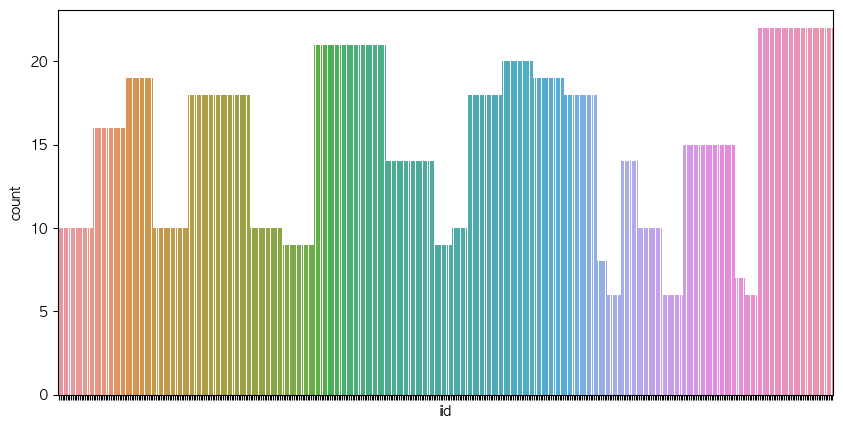

In [14]:
plt.figure(figsize = (10, 5))
sns.barplot(x="iid", y="count", data=data_iid)
#palette=['yellowgreen', 'crimson']
plt.tick_params(labelbottom=False)
#plt.yticks(fontsize = 8)
plt.show()

### 2.3 결측치 처리

#### 열 별 결측값 개수 확인

In [15]:
# 119 ~ 195 변수 중 10개 변수의 결측치 확인
data.iloc[:,119:129].isnull().sum()

satis_2      751
length       751
numdat_2     781
attr7_2     4832
sinc7_2     4861
intel7_2    4832
fun7_2      4832
amb7_2      4861
shar7_2     4842
attr1_2      769
dtype: int64

119 ~ 195 변수는 소개팅 다음날 followup 설문조사로 응답률이 적음을 확인하였다. 따라서 이들을 제거하기로 결정하였다.

In [16]:
# 119 ~ 195변수 제거
data = data[data.columns[:119]]

In [17]:
data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr3_s     4202
sinc3_s     4202
intel3_s    4202
fun3_s      4202
amb3_s      4202
Length: 119, dtype: int64

In [18]:
# 결측 비율이 25%가 넘어가는 column 출력
notremove_list = []
for i in range(len(data.columns)):
    if (data.iloc[:,i].isnull().sum())/len(data) > 0.25:
        print(data.columns[i])
    else:
        notremove_list.append(i)

positin1
undergra
mn_sat
tuition
income
expnum
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s


### 이 중 6가지의 특성이 모두 결측이 많은 attr,sinc,intel,fun,amb,shar/4_1, 5_1, 1_s, 3_s 를 제거한다.

참고) shar5_1, shar3_s은 존재하지 않음

In [19]:
# 나머지 변수들의 결측값 개수 확인
print('positin1 : ', data['positin1'].isnull().sum())
print('undergra : ', data['undergra'].isnull().sum())
print('mn_sat : ', data['mn_sat'].isnull().sum())
print('tuition : ', data['tuition'].isnull().sum())
print('income : ', data['income'].isnull().sum())
print('expnum : ', data['expnum'].isnull().sum())

positin1 :  1846
undergra :  1902
mn_sat :  3683
tuition :  3233
income :  3473
expnum :  5016


역 정보, 학위정보, 대학의 SAT 정보 등 중요하지 않거나 다른 변수로 대체 가능하거나 너무 많은 결측값으로 활용하기 어려운 경우이므로 제거한다.

In [20]:
data = data[data.columns[notremove_list]]

#### 스피드데이팅 진행 방식 도출에서 발견한 pid와 id의 결측값 처리

In [21]:
data[data['id'].isnull()]

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
6815,552,NaN,1,44,2,21,22,2,15,22,...,3.0,7.0,6.0,4.0,8.0,1.0,4.0,5.0,0.0,3.0


In [22]:
data.iloc[6810:6820,:] # 누락 id는 22임을 확인

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
6810,552,22.0,1,44,2,21,22,17,8,17,...,7.0,5.0,5.0,5.0,6.0,NaN,4.0,4.0,0.0,3.0
6811,552,22.0,1,44,2,21,22,14,5,18,...,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0
6812,552,22.0,1,44,2,21,22,13,4,19,...,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0
6813,552,22.0,1,44,2,21,22,19,10,20,...,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0
6814,552,22.0,1,44,2,21,22,3,16,21,...,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,3.0
6815,552,NaN,1,44,2,21,22,2,15,22,...,3.0,7.0,6.0,4.0,8.0,1.0,4.0,5.0,0.0,3.0


In [23]:
data.loc[6815,'id'] = 22

In [24]:
data[data['pid'].isnull()]

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
1755,122,1.0,1,2,1,5,10,4,6,7,...,6.0,10.0,8.0,8.0,8.0,8.0,8.0,4.0,2.0,4.0
1765,123,2.0,1,4,1,5,10,4,10,7,...,4.0,5.0,5.0,4.0,5.0,5.0,4.0,1.0,2.0,0.0
1775,124,3.0,1,6,1,5,10,4,3,7,...,6.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,2.0,6.0
1785,125,4.0,1,8,1,5,10,4,8,7,...,7.0,7.0,6.0,6.0,5.0,5.0,5.0,4.0,2.0,6.0
1795,126,5.0,1,10,1,5,10,4,1,7,...,7.0,7.0,6.0,8.0,8.0,6.0,7.0,5.0,1.0,1.0
1805,127,6.0,1,12,1,5,10,4,7,7,...,7.0,7.0,6.0,5.0,5.0,5.0,6.0,5.0,2.0,7.0
1815,128,7.0,1,14,1,5,10,4,9,7,...,8.0,9.0,9.0,8.0,8.0,8.0,8.0,7.0,2.0,7.0
1825,129,8.0,1,15,1,5,10,4,5,7,...,7.0,8.0,9.0,10.0,7.0,NaN,7.0,7.0,2.0,5.0
1835,130,9.0,1,16,1,5,10,4,2,7,...,1.0,5.0,5.0,4.0,3.0,1.0,3.0,NaN,2.0,2.0
1845,131,10.0,1,18,1,5,10,4,4,7,...,6.0,6.0,7.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0


In [25]:
data.loc[1750:1770,'pid']

1750    116.0
1751    117.0
1752    119.0
1753    120.0
1754    121.0
1755      NaN
1756    112.0
1757    113.0
1758    114.0
1759    115.0
1760    116.0
1761    117.0
1762    119.0
1763    120.0
1764    121.0
1765      NaN
1766    112.0
1767    113.0
1768    114.0
1769    115.0
1770    116.0
Name: pid, dtype: float64

Wave 5번은 남여 각각 10명이 존재한다고 설명에 쓰여있으나 확인해본 결과 여성 9명, 남성 10명의 데이터가 존재함  
또한, id 118번의 데이터가 존재하지 않았으며 pid의 결측값은 118임을 유추할 수 있음  
그러나, id 118번의 상대 데이터는 존재하나 118번이 직접 응답한 데이터는 없으므로 해당 행을 모두 제거하기로 결정

In [26]:
data = data.dropna(subset=['pid'], axis=0).reset_index(drop=True)

#### 행 별 결측값 개수 확인

6개의 특성을 모두 입력하지 않은 실험자가 존재한다면 해당 결측값을 대체하기 어려우므로 6을 기준으로 행을 제거하기로 결정하였다.

In [27]:
data[data.isnull().sum(axis = 1)>=6]

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
245,23,3.0,0,5,2,2,16,3,8,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
258,24,4.0,0,7,2,2,16,10,9,11,...,6.0,8.0,NaN,8.0,NaN,NaN,7.0,7.0,2.0,1.0
312,28,8.0,0,15,2,2,16,1,3,1,...,3.0,6.0,6.0,6.0,5.0,2.0,2.0,4.0,2.0,3.0
313,28,8.0,0,15,2,2,16,1,4,2,...,2.0,6.0,5.0,4.0,5.0,2.0,2.0,2.0,2.0,3.0
314,28,8.0,0,15,2,2,16,1,5,3,...,3.0,5.0,8.0,5.0,8.0,3.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,549,19.0,1,38,2,21,22,8,2,13,...,6.0,9.0,8.0,7.0,8.0,7.0,6.0,6.0,0.0,3.0
6765,551,21.0,1,42,2,21,22,7,9,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6772,551,21.0,1,42,2,21,22,20,22,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6787,552,22.0,1,44,2,21,22,7,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [28]:
# 예시
data[data['attr'].isnull()][['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]

,attr,sinc,intel,fun,amb,shar
159,NaN,8.0,7.0,7.0,7.0,7.0
245,NaN,NaN,NaN,NaN,NaN,NaN
324,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,5.0,6.0,5.0,6.0,3.0
653,NaN,3.0,8.0,4.0,6.0,3.0
...,...,...,...,...,...,...
6663,NaN,NaN,NaN,NaN,NaN,NaN
6699,NaN,NaN,NaN,NaN,NaN,NaN
6765,NaN,NaN,NaN,NaN,NaN,NaN
6772,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data = data.drop(data[data.isnull().sum(axis = 1)>=6].index, axis=0).reset_index(drop=True)

특성 변수에서의 null값을 0으로 대체한다. (특성의 총합이 100인데, 0대신 nan값이 들어가 있음을 확인)

In [30]:
# 예시
data[data['amb1_1'].isnull()][['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
1718,40.0,20.0,20.0,20.0,NaN,NaN
1719,40.0,20.0,20.0,20.0,NaN,NaN
1720,40.0,20.0,20.0,20.0,NaN,NaN
1721,40.0,20.0,20.0,20.0,NaN,NaN
1722,40.0,20.0,20.0,20.0,NaN,NaN
1723,40.0,20.0,20.0,20.0,NaN,NaN
1724,40.0,20.0,20.0,20.0,NaN,NaN
1725,40.0,20.0,20.0,20.0,NaN,NaN
1726,40.0,20.0,20.0,20.0,NaN,NaN


In [31]:
for att in ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']:
    data[att+'_o'].fillna(0, inplace=True)
    data[att+'1_1'].fillna(0, inplace=True)
    data[att+'2_1'].fillna(0, inplace=True)
    if att != 'shar': # 자신이 보는 나를 뜻하는 3_1에서 shar(비슷함)은 존재하지 않음
        data[att+'3_1'].fillna(0, inplace=True)
    data[att].fillna(0, inplace=True)

data.fillna({'pf_o_att': 0, 'pf_o_sin': 0, 'pf_o_int': 0, 'pf_o_fun': 0, 'pf_o_amb': 0, 'pf_o_sha': 0}, inplace=True)

나머지 변수에 대한 결측값 처리는 다음과 같이 진행한다.

met_o(만남여부 변수) -> 0  
age -> 나이 평균  
date(데이트를얼마나자주하는지) -> 평균  
exphappy(기대하는정도) -> 평균  

In [32]:
data['met_o'].fillna(0, inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)
data['age_o'].fillna(data['age_o'].mean(), inplace=True)
data['date'].fillna(data['date'].mean(), inplace=True)
data['exphappy'].fillna(data['exphappy'].mean(), inplace=True)

### 2.4 이상치 처리

met(이전에 만났었는지) 1 or 2

In [33]:
data['met'].value_counts()

met
0.0    3476
2.0    2549
1.0     228
5.0       2
3.0       1
7.0       1
Name: count, dtype: int64

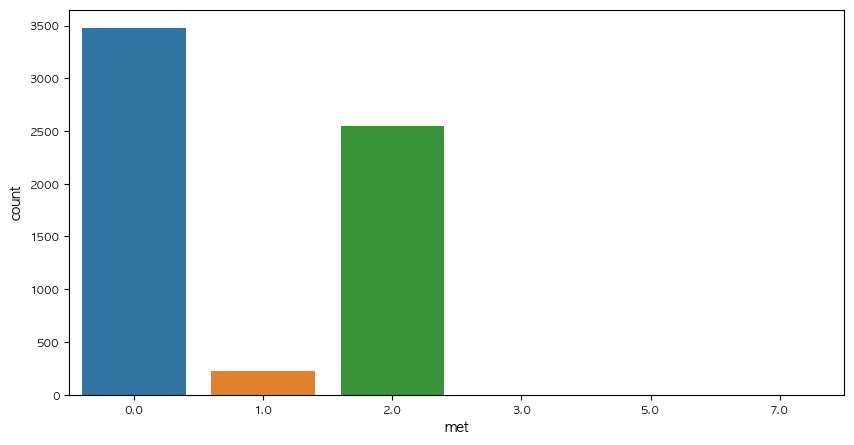

In [34]:
plt.figure(figsize = (10, 5)) 

sns.countplot(data = data, x = 'met')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
    
plt.show()

data 소개에 따르면 met은  
> 1=yes  
2=no  

를 의미하는데 이상치가 너무 많이 존재함을 확인하였다.

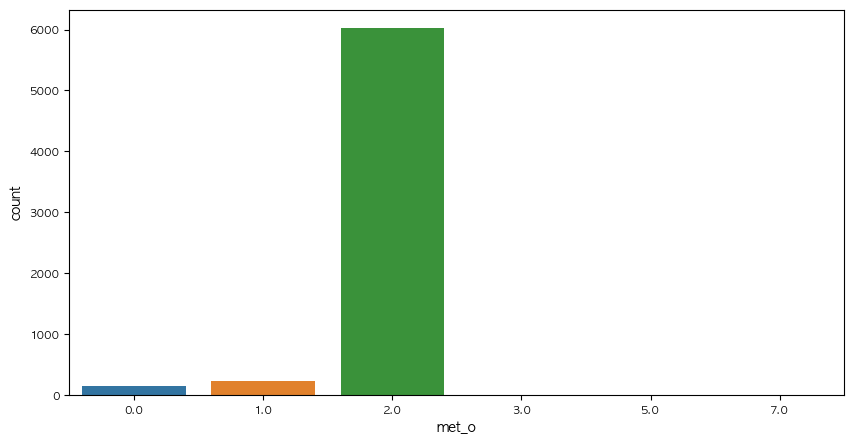

In [35]:
plt.figure(figsize = (10, 5)) 

sns.countplot(data = data, x = 'met_o')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
    
plt.show()

met_o(met의 상대방 응답)을 확인한 결과 이상치가 거의 존재하지 않아 해당 변수를 **만남여부** 변수로 사용하기로 하였다.

In [36]:
data.drop('met', axis = 1, inplace = True)

#### 가져야할 값 이외의 값을 갖는 이상치 처리

In [37]:
# 모든 요소의 통계량 확인
data[data.columns[2:16]].describe()

,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,0.498829,17.319494,1.832527,12.068675,16.864523,9.105822,8.846106,8.977056,304.788044,0.169814,0.196504,0.398158,26.280006,2.800219
std,0.500038,11.012743,0.373427,6.402561,4.428225,5.530494,5.454438,5.544777,167.847345,0.375499,0.304470,0.489557,3.579406,1.242039
min,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.730000,0.000000,18.000000,1.000000
25%,0.000000,8.000000,2.000000,5.000000,14.000000,4.000000,4.000000,4.000000,115.000000,0.000000,-0.020000,0.000000,24.000000,2.000000
50%,0.000000,16.000000,2.000000,13.000000,18.000000,8.000000,8.000000,8.000000,327.000000,0.000000,0.210000,0.000000,26.000000,2.000000
75%,1.000000,26.000000,2.000000,17.000000,21.000000,13.000000,13.000000,13.000000,442.000000,0.000000,0.430000,1.000000,28.000000,4.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,552.000000,1.000000,0.910000,1.000000,55.000000,6.000000


In [38]:
data[data.columns[16:31]].describe()

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6380.000000,6325.000000
mean,23.881408,17.347540,20.615697,17.311164,9.726658,11.182674,0.426253,6.149977,7.076245,7.251756,6.272124,6.336039,4.885984,6.124718,5.150672
std,13.385522,7.704922,7.452225,6.680467,6.101815,6.706958,0.494570,1.964467,1.899049,1.730221,2.108414,2.367154,2.624186,1.833501,2.153811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,10.530000,18.000000,13.000000,5.000000,5.000000,0.000000,5.000000,6.000000,6.000000,5.000000,5.000000,3.000000,5.000000,4.000000
50%,20.000000,20.000000,20.000000,18.000000,10.000000,10.000000,0.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,6.000000,5.000000
75%,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000
max,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,1.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000


attr_o, fun_o -> max에 이상치 10으로 처리

In [39]:
data[data.columns[31:46]].describe()

,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports
count,6407.000000,6407.000000,6389.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6351.000000,6407.000000
mean,1.919775,26.282401,7.470653,2.798189,3.652880,3.667707,2.121742,5.014556,2.158577,5.264368,6.405650
std,0.359251,3.580943,3.844662,1.241648,2.807654,2.821729,1.399514,1.449302,1.158180,3.375622,2.621649
min,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000
50%,2.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,7.000000
75%,2.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,9.000000
max,7.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,17.000000,10.000000


met_o -> 1,2 값을 가지므로 2이상의 값들은 모두 2로 통일

In [40]:
data[data.columns[46:61]].describe()

,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,4.532855,6.171843,7.815826,6.973935,6.732324,5.721867,3.852505,5.690339,7.642891,5.294366,6.829717,7.970657,6.926018,7.851256,5.665678
std,2.829774,2.435359,1.758290,2.062429,2.277842,2.606231,2.621557,2.478116,2.007126,2.474750,2.234993,1.710397,2.117414,1.791995,2.584201
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,5.000000,7.000000,6.000000,5.000000,3.000000,1.500000,4.000000,7.000000,3.000000,5.000000,7.000000,6.000000,7.000000,4.000000
50%,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000
75%,7.000000,8.000000,9.000000,8.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


gaming, reading -> max에 이상치 10으로 처리

In [41]:
data[data.columns[61:76]].describe()

,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,4.371157,5.592332,23.743434,17.366270,20.646132,17.350184,9.759903,11.199218,32.696738,12.610426,14.145154,18.388481,11.023880,11.188700,6.983300
std,2.726112,1.760346,13.077387,7.687604,7.426908,6.642301,6.094089,6.703763,16.670878,7.412320,6.754134,7.134847,7.198811,6.461912,1.463641
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,15.000000,10.530000,18.000000,13.500000,5.000000,5.000000,20.000000,7.000000,10.000000,15.000000,5.000000,5.000000,6.000000
50%,4.000000,6.000000,20.000000,20.000000,20.000000,18.000000,10.000000,10.000000,30.000000,10.000000,15.000000,20.000000,10.000000,10.000000,7.000000
75%,7.000000,7.000000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,40.000000,20.000000,20.000000,20.000000,15.000000,15.000000,8.000000
max,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,100.000000,50.000000,40.000000,50.000000,50.000000,30.000000,10.000000


In [42]:
data[data.columns[76:]].describe()

,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,match_es
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6380.000000,6329.000000,5919.000000
mean,8.243172,7.652099,8.314344,7.491962,0.426409,6.149899,7.079522,7.252224,6.272905,6.338068,4.883955,6.125972,5.153421,3.196452
std,1.490062,1.628535,1.152236,1.836569,0.494593,1.963032,1.898544,1.733623,2.107017,2.366107,2.626327,1.832817,2.152932,2.374533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,8.000000,7.000000,0.000000,5.000000,6.000000,6.000000,5.000000,5.000000,3.000000,5.000000,4.000000,2.000000
50%,8.000000,8.000000,8.000000,8.000000,0.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,6.000000,5.000000,3.000000
75%,9.000000,9.000000,9.000000,9.000000,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.000000


In [43]:
# 앞서 확인한 이상치 처리
for i in range(len(data)):
    if data.loc[i,'attr_o'] > 10:
        data.loc[i,'attr_o'] = 10
    if data.loc[i,'fun_o'] > 10:
        data.loc[i,'fun_o'] = 10
    if data.loc[i,'met_o'] > 2:
        data.loc[i,'met_o'] = 2
    if data.loc[i,'gaming'] > 10:
        data.loc[i,'gaming'] = 10
    if data.loc[i,'reading'] > 10:
        data.loc[i,'reading'] = 10

### 2.5 범주형 변수 처리

범주형 변수를 다음 두 가지 방법으로 처리한다.

1. 많은 범주를 가지고 있는 범주형 변수는 과적합의 우려가 있어 제거한다.
2. 많은 범주를 가지고 있는 범주형 변수는 범주를 통합하여 적은 범주를 가지고 있는 범주형 변수로 바꿔준다.

In [44]:
data['from'].value_counts() #227개의 범주

from
New York                     337
New Jersey                   320
California                   271
Italy                        125
Texas                        119
                            ... 
Manila, Philippines            6
TN                             6
india                          6
Santa Barbara, California      6
Pittsburgh, PA                 5
Name: count, Length: 226, dtype: int64

도시가 적혀있는 경우와 나라가 적혀있는 경우 그리고 모두 적혀있는 경우가 존재하므로 다루기 어려움 -> 비슷한 의미의 변수도 존재하므로 제거

In [45]:
data['zipcode'].value_counts() # 우편번호 -> 같으면 1 다르면 0 으로 바꿔서 동네사람인지 변수로 바꾸기

zipcode
0         290
10,027    100
10,021     93
10,025     90
11,235     37
         ... 
10,804      6
32,304      6
90,620      6
11,432      6
15,146      5
Name: count, Length: 342, dtype: int64

In [46]:
data['field'].value_counts()

field
Law                               424
Business                          383
Social Work                       370
MBA                               338
Electrical Engineering            154
                                 ... 
Business (Finance & Marketing)      6
Fundraising Management              6
art history                         6
Instructional Tech & Media          6
math of finance                     6
Name: count, Length: 213, dtype: int64

범주를 통합하여 적은 범주를 가지고 있는 범주형 변수로 바꾸는 대신 이미 존재하는 field_cd를 대신 활용  
field_cd : field의 coded, field를 18개의 범주로 포괄함

In [47]:
data['career'].value_counts()

career
Lawyer                    151
Professor                 135
Social Worker             133
Law                       114
Finance                   108
                         ... 
unsure                      6
Writer/Editor               6
consultant                  6
Professor, or Engineer      6
Investment Management       5
Name: count, Length: 314, dtype: int64

field와 같은 이유로 career_c를 대신 활용

field_cd와 career_c는 같으면 1 다르면 0 으로 바꿔서 같은 분야/직업 여부 변수로 바꾸기로 하였다.

In [48]:
data_zipcode = data[['iid', 'zipcode']]

In [49]:
data_zipcode

,iid,zipcode
0,1,"60,521"
1,1,"60,521"
2,1,"60,521"
3,1,"60,521"
4,1,"60,521"
...,...,...
6402,552,"78,110"
6403,552,"78,110"
6404,552,"78,110"
6405,552,"78,110"


In [50]:
data[data['zipcode'] == '-1'] # -1에 해당하는 우편번호가 없음을 확인
data['zipcode'].fillna('-1', inplace=True)

zipcode가 결측이면 '-1'을 입력한다

In [51]:
# 위 결측에서 행을 제거하면서 zipcode 사전에 결측이 생김 -> 원래 데이터 불러와서 사전 따로 만듦
data_origin = pd.read_csv('./data_speed_dating/Speed Dating Data.csv', encoding='cp949')
data_origin['zipcode'].fillna('-1', inplace=True)
data_zipcode_dict = dict(zip(data_origin['iid'], data_origin['zipcode']))

In [52]:
data.loc[:,'zipcode_is'] = 0 # zipcode가 같은지 여부
for i in range(len(data)):
    if data.loc[i,'zipcode'] == data_zipcode_dict[data.loc[i,'pid']]: # 나의 zipcode == 상대의 zipcode
        data.loc[i,'zipcode_is'] = 1
    else:
        data.loc[i,'zipcode_is'] = 0

In [53]:
data['zipcode_is'].value_counts()

zipcode_is
0    6187
1     220
Name: count, dtype: int64

In [54]:
data_field_dict = dict(zip(data_origin['iid'], data_origin['field_cd']))
data_career_dict = dict(zip(data_origin['iid'], data_origin['career_c']))

In [55]:
data.loc[:,'field_is'] = 0 # zipcode가 같은지 여부
for i in range(len(data)):
    if data.loc[i,'field_cd'] == data_field_dict[data.loc[i,'pid']]: # 나의 field == 상대의 field
        data.loc[i,'field_is'] = 1
    else:
        data.loc[i,'field_is'] = 0

In [56]:
data.loc[:,'career_is'] = 0 # zipcode가 같은지 여부
for i in range(len(data)):
    if data.loc[i,'career_c'] == data_career_dict[data.loc[i,'pid']]: # 나의 career == 상대의 career
        data.loc[i,'career_is'] = 1
    else:
        data.loc[i,'career_is'] = 0

In [57]:
data['field_is'].value_counts()

field_is
0    5784
1     623
Name: count, dtype: int64

In [58]:
data['career_is'].value_counts()

career_is
0    5392
1    1015
Name: count, dtype: int64

In [59]:
data.drop('from', axis = 1, inplace = True)
data.drop('career', axis = 1, inplace = True)
data.drop('career_c', axis = 1, inplace = True)
data.drop('zipcode', axis = 1, inplace = True)
data.drop('field', axis = 1, inplace = True)
data.drop('field_cd', axis = 1, inplace = True)

### 2.6 변수 생성

#### dec_ratio변수

dec 변수를 활용하여 wave안에서 맘에 들었던 상대가 몇명이었는지를 나타내는 변수를 생성한다.

In [60]:
dec_ratio = data.groupby('iid').agg({'dec' : 'sum', 'round' : 'max'}).reset_index() 

In [61]:
dec_ratio['dec_ratio'] = dec_ratio['dec'] / dec_ratio['round']

In [62]:
dec_ratio.drop(['dec', 'round'], axis = 1, inplace = True)

In [63]:
data = pd.merge(data, dec_ratio, how='left', on='iid') # iid를 기준으로 병합

#### 취미 흥미도 변수 병합

exercise ~ tv 변수는 흥미도를 1-10까지 나타낸 변수이다.
해당 변수들의 연관성 plot 그린 후에 묶은 새 변수 생성할 예정이다.

<Axes: >

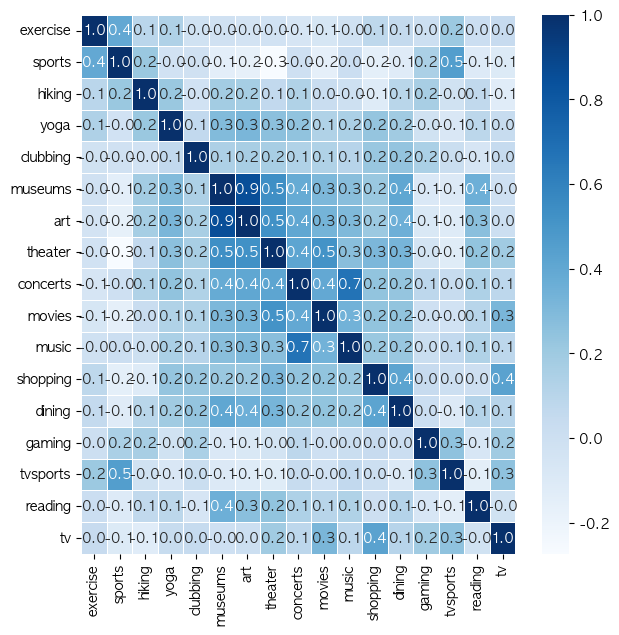

In [64]:
plt.figure(figsize=(7,7))
sns.heatmap(data = data[['exercise', 'sports', 'hiking', 'yoga', 'clubbing', 'museums', 'art', 'theater', 'concerts' , 'movies' , 'music', 'shopping', 'dining', 'gaming', 'tvsports', 'reading', 'tv']].corr(), annot=True, 
fmt = '.1f', linewidths=.5, cmap='Blues')

서로 연관성이 높은 (0.4기준) 변수끼리 하나의 변수로 생성한다.  

museums + art + theater + concerts + movies + music -> culture  
exercise + sports + tvsports -> active  

나머지는 서로 연관성이 거의 없는 취미이므로 정적인 취미와 동적인 취미로 나누어 묶어주었다.  
hiking + yoga + clubbing -> dynamic  
dining + gaming + reading + tv + shopping -> static  

In [65]:
data['culture'] = data['museums'] + data['art'] + data['theater'] + data['concerts'] + data['movies'] + data['music']
data['active'] = data['exercise'] + data['sports'] + data['tvsports']
data['dynamic'] = data['hiking'] + data['yoga'] + data['clubbing']
data['static'] = data['dining'] + data['gaming'] + data['reading'] + data['tv'] + data['shopping']

취미를 나타내는 변수이므로, 상대와 취미에 대한 흥미가 얼마나 다른지를 나타내는 변수(ex.culture = abs(나의 culture - 상대 culture))로 바꿔준다.

In [66]:
# 앞서 결측치 처리 과정에서 삭제된 행이 있어 다음과 같이 진행
data_origin['culture'] = data_origin['museums'] + data_origin['art'] + data_origin['theater'] + data_origin['concerts'] + data_origin['movies'] + data_origin['music']
data_origin['active'] = data_origin['exercise'] + data_origin['sports'] + data_origin['tvsports']
data_origin['dynamic'] = data_origin['hiking'] + data_origin['yoga'] + data_origin['clubbing']
data_origin['static'] = data_origin['dining'] + data_origin['gaming'] + data_origin['reading'] + data_origin['tv'] + data_origin['shopping']

In [67]:
data_culture_dict = dict(zip(data_origin['iid'], data_origin['culture']))
data_active_dict = dict(zip(data_origin['iid'], data_origin['active']))
data_dynamic_dict = dict(zip(data_origin['iid'], data_origin['dynamic']))
data_static_dict = dict(zip(data_origin['iid'], data_origin['static']))

In [68]:
data.loc[:,'culture_rela'] = 0 # 상대와의 취미 중 문화에서의 흥미도 차이
data.loc[:,'active_rela'] = 0 # 상대와의 취미 중 활동적인 취미에서의 흥미도 차이
data.loc[:,'dynamic_rela'] = 0 # 상대와의 취미 중 동적인 취미에서의 흥미도 차이
data.loc[:,'static_rela'] = 0 # 상대와의 취미 중 정적인 취미에서의 흥미도 차이

for i in range(len(data)):
    data.loc[i,'culture_rela'] = abs(data.loc[i,'culture'] - data_culture_dict[data.loc[i,'pid']])
    data.loc[i,'active_rela'] = abs(data.loc[i,'active'] - data_active_dict[data.loc[i,'pid']])
    data.loc[i,'dynamic_rela'] = abs(data.loc[i,'dynamic'] - data_dynamic_dict[data.loc[i,'pid']])
    data.loc[i,'static_rela'] = abs(data.loc[i,'static'] - data_static_dict[data.loc[i,'pid']])

사용한 변수들 제거 (culture, active, dynamic, static은 eda 후 제거예정)

In [69]:
data.drop(['exercise', 'sports', 'hiking', 'yoga', 'clubbing', 'museums', 'art', 'theater', 'concerts' , 'movies' , 'music', 'shopping', 'dining', 'gaming', 'tvsports', 'reading', 'tv'], axis = 1, inplace = True)

#### 나이차이 변수 생성

In [70]:
data['age_diff'] = abs(data['age'] - data['age_o'])

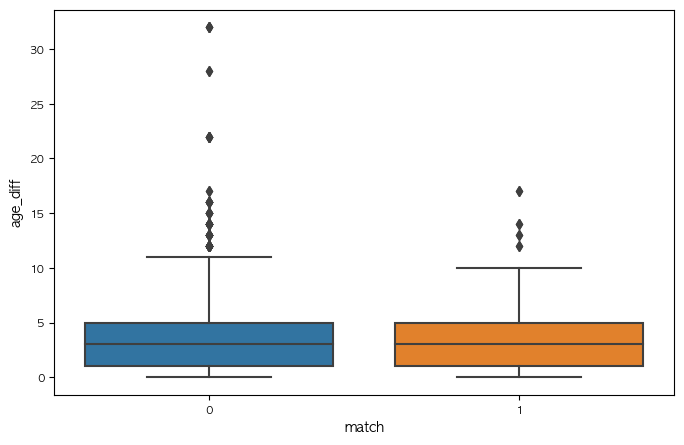

In [71]:
plt.figure(figsize = (8, 5)) 

sns.boxplot(x='match', y='age_diff', data=data)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
    
plt.show()

#### 특성 변수(attr,sinc,intel,fun,amb,shar) 통합

특성 중 attr을 기준으로 의미를 분석하자면 다음과 같다.  
pf_o_att - 상대의 attr1_1 응답  
attr_o - 데이트 후 상대가 나에 대한 응답  
attr1_1 - 이성을 볼때 중요하게 생각하는 것  
attr2_1 - 이성과 데이트할지 결정할 때 중요하게 생각하는 것 (1_1과 유사)  
attr3_1 - 자신이 보는 나  
attr - 데이트 후 상대에 대한 응답 

attr1_1과 attr2_1의 의미가 비슷하므로 평균을 내어 하나로 통합하고,   
**내가 보는 상대(attr12-attr) 특성 attr_pat 변수를 생성**

**상대가 보는 나(pf_o_att-attr_o) 특성 attr_me 변수를 생성**

마지막으로, 자신이 보는 자신의 특성은 소개팅 성공여부에 영향을 주지 않을것이라 판단하여 제거하기로 한다.

In [72]:
# attr_pat
for att in ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']:
    data[att+'12'] = (data[att+'1_1'] + data[att+'2_1'])/2
    data[att+'_pat'] = data[att+'12'] - data[att]

# attr_me    
data['attr_me'] = data['pf_o_att'] - data['attr_o']
data['sinc_me'] = data['pf_o_sin'] - data['sinc_o']
data['intel_me'] = data['pf_o_int'] - data['intel_o']
data['fun_me'] = data['pf_o_fun'] - data['fun_o']
data['amb_me'] = data['pf_o_amb'] - data['amb_o']
data['shar_me'] = data['pf_o_sha'] - data['shar_o']

In [73]:
# 사용한 변수들 제거
drop_list = []
for att in ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']:
    drop_list.append(att+'_o')
    drop_list.append(att+'1_1')
    drop_list.append(att+'2_1')
    drop_list.append(att+'3_1')
    drop_list.append(att)
    drop_list.append(att+'12')
drop_list.remove('shar3_1') # 자신이 보는 나를 뜻하는 3_1에서 shar(비슷함)은 존재하지 않음
drop_list += ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

In [74]:
data.drop(drop_list, axis = 1, inplace = True)

### 2.7 변수 제거

#### 가설 : `go_out`(외출횟수)와 `date`(데이트를얼마나자주하는지)가 비슷한 의미를 갖는다. (상관관계가 있을 것이다.)

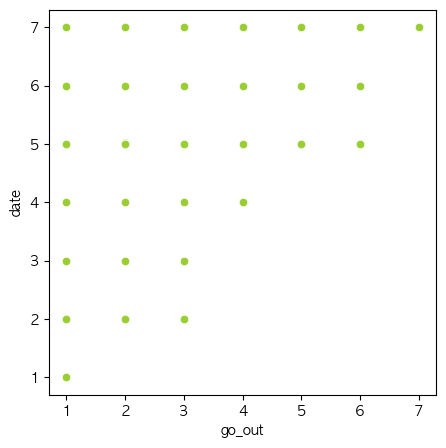

In [75]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x='go_out', y='date', color='yellowgreen', data=data)
plt.show()

In [76]:
# na 제외
print(stats.pearsonr(data[data['go_out'].notnull() & data['date'].notnull()]['go_out'], data[data['go_out'].notnull() & data['date'].notnull()]['date']))

PearsonRResult(statistic=0.3340719458237599, pvalue=7.705532850791923e-167)


두 변수는 약한 선형관계를 가지나, 유의미한 상관관계를 확인하였다. 따라서 두 변수 중 연애와 관련이 상대적으로 적은 go_out변수를 제거하기로 결정하였다. (eda 후 제거)

#### 다중공선성을 고려하여 상대나이 제거

자신의 나이를 나타내는 변수(age)와 나이차이를 나타내는 변수(age_diff)변수가 존재하므로 상대나이 변수를 제거하기로 결정하였다.

In [77]:
data.drop(['age_o'], axis = 1, inplace = True)

#### condtn 1 제한된 선택 2 동적 선택 -> 기준과 의미가 명확하지 않으므로 제거

In [78]:
data['condtn'].value_counts()

condtn
2    5334
1    1073
Name: count, dtype: int64

In [79]:
data.drop(['condtn'], axis = 1, inplace = True)

#### 인종은 중요하지 않다고 가정 -> race, race_o(인종 변수), samerace(같은인종인지 여부), imprace(같은 인종여부가 얼마나 중요한지) 제거

In [80]:
data.drop(['race', 'race_o', 'samerace', 'imprace'], axis = 1, inplace = True)

#### 치팅의 위험이 있는 변수 제거

In [81]:
data.drop(['like', 'like_o'], axis = 1, inplace = True)

#### 성공요인과 관련없는 변수 제거

In [82]:
# match_es : 예상매칭 성공 수, prob : 상대방이 나를 선택할 가능성 (like와 유사한 이유로 제거)
data.drop(['match_es', 'prob', 'prob_o'], axis = 1, inplace = True)

## 3 탐색적 데이터 분석(EDA)을 통한 소개팅 성공요인 분석

### 가설 : 나이별로 소개팅에서 중요하게 생각하는 요소와 성공 요소가 다를 것이다.

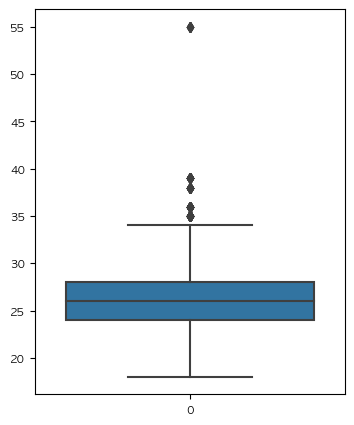

In [83]:
# age 분포 확인
plt.figure(figsize = (4, 5))

sns.boxplot(data['age'])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
    
plt.show()

age분포에 따라 10대 & 20대 초반, 20대 중반, 20대 후반, 30-34, 35이상 5개의 그룹으로 나누어 분석하기로 하였다.

In [84]:
data.loc[:,'age_group'] = '' # age그룹 
for i in range(len(data)):
    if data.loc[i,'age'] <= 22:
        data.loc[i,'age_group'] = '10대&20대초반'
    elif data.loc[i,'age'] <= 26:
        data.loc[i,'age_group'] = '20대중반'
    elif data.loc[i,'age'] <= 29:
        data.loc[i,'age_group'] = '20대후반'
    elif data.loc[i,'age'] <= 34:
        data.loc[i,'age_group'] = '30대초반'
    else:
        data.loc[i,'age_group'] = '35세이상'

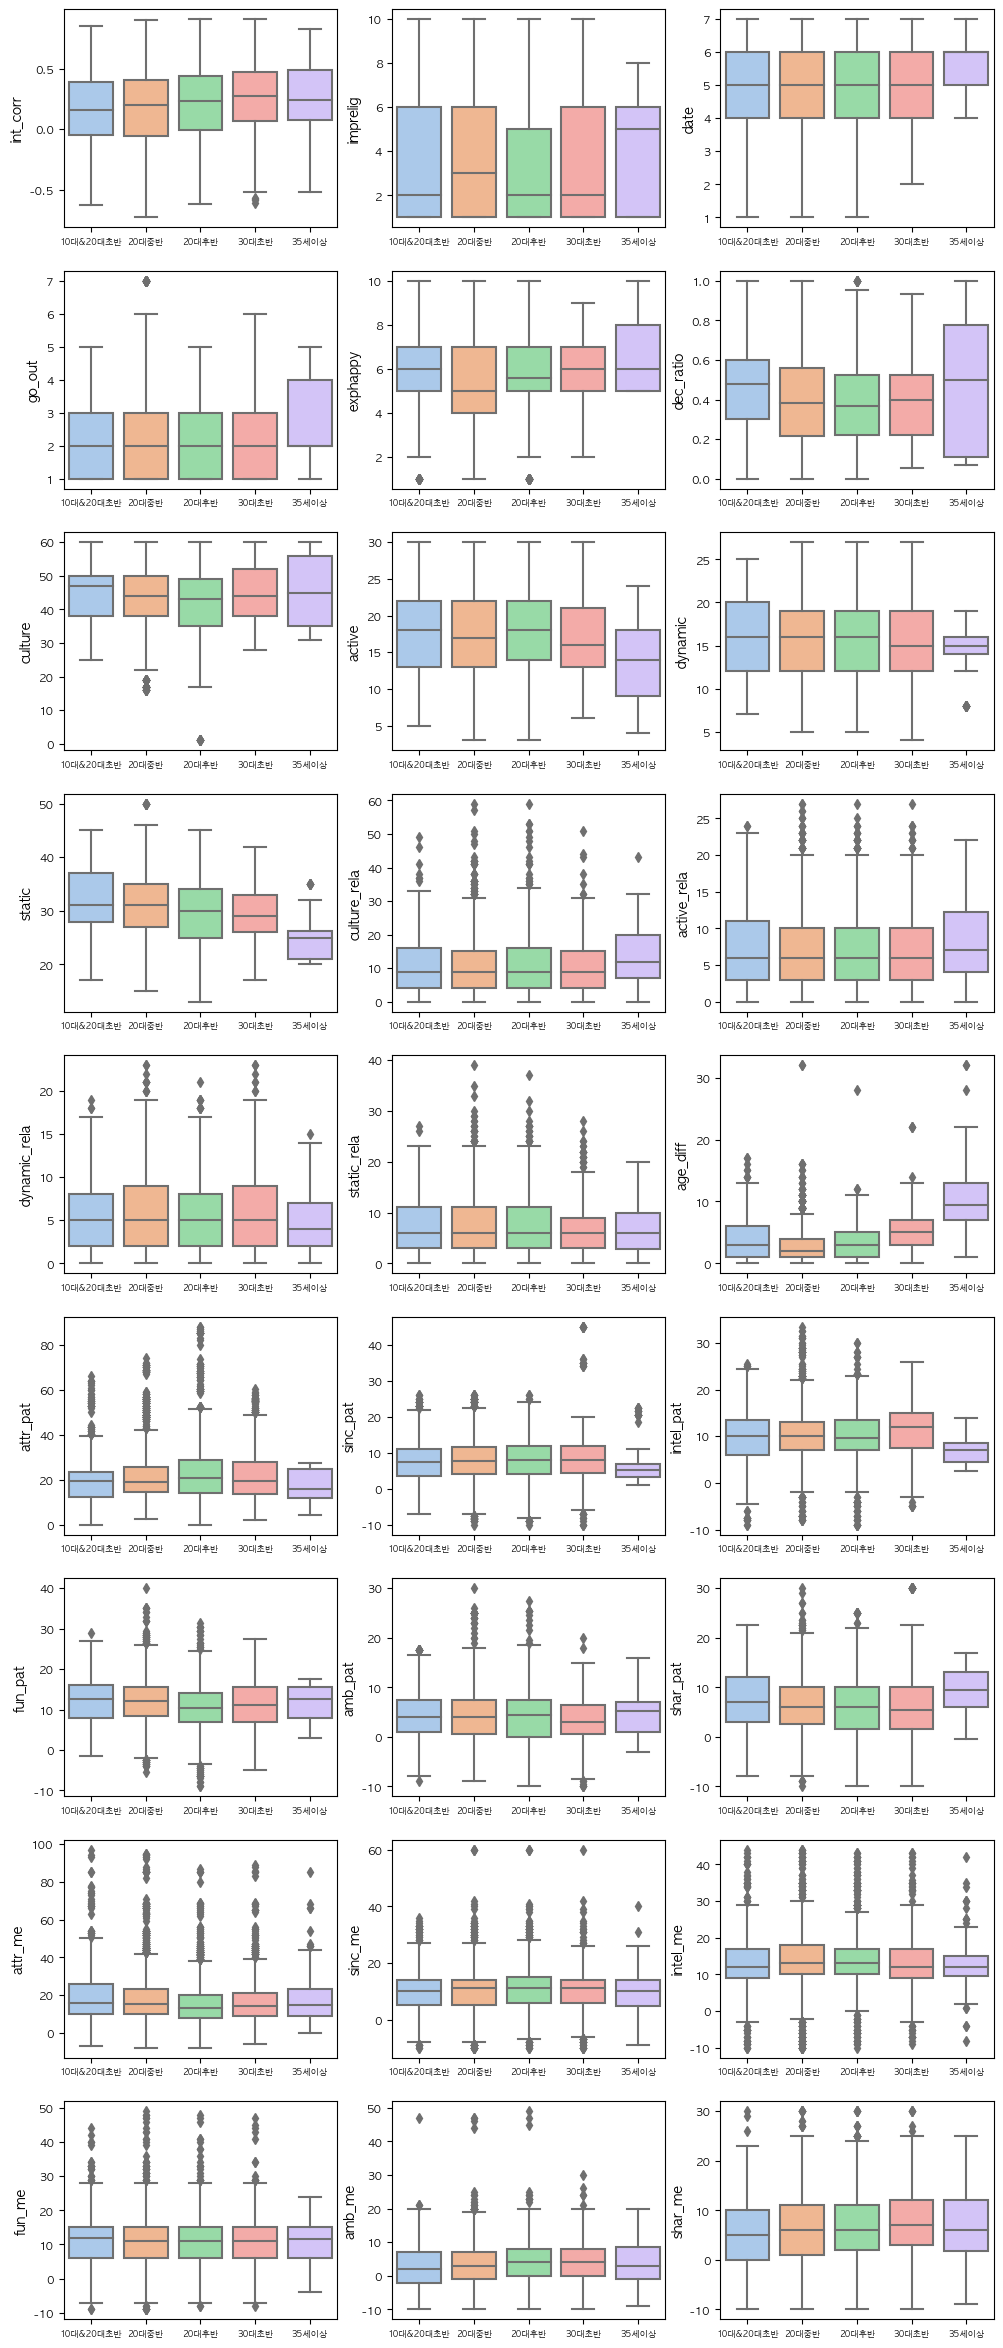

In [85]:
# 나이 별 분석
plt.figure(figsize = (12, 30)) 

i = 1
for col in data.columns:
    if (data[col].dtype in ['float64', 'int64']) and (col not in ['id', 'idg', 'iid', 'round', 'gender', 'position', 'order', 'partner', 'wave', 'samerace', 'dec', 'dec_o', 'career_is', 'field_is', 'pid', 'match', 'goal', 'met_o', 'age', 'zipcode_is', 'age_group', 'field_cd', 'career_c']):
        plt.subplot(9,3,i) 
        sns.boxplot(x='age_group', y=col, data=data, palette = 'pastel')
        plt.xticks(fontsize = 6)
        plt.yticks(fontsize = 8)
        plt.xlabel('')
        plt.legend([], [], frameon=False)
        i += 1
        

plt.show()

### ✅ EDA 인사이트1

🔍 35세 이상의 참가자들은 종교가 중요하다(impreling)에서 높은 점수에 많이 분포되어있음을 확인하였다.  
🔑 35세 이상의 참가자는 같은 종교의 참가자와 매칭한다.

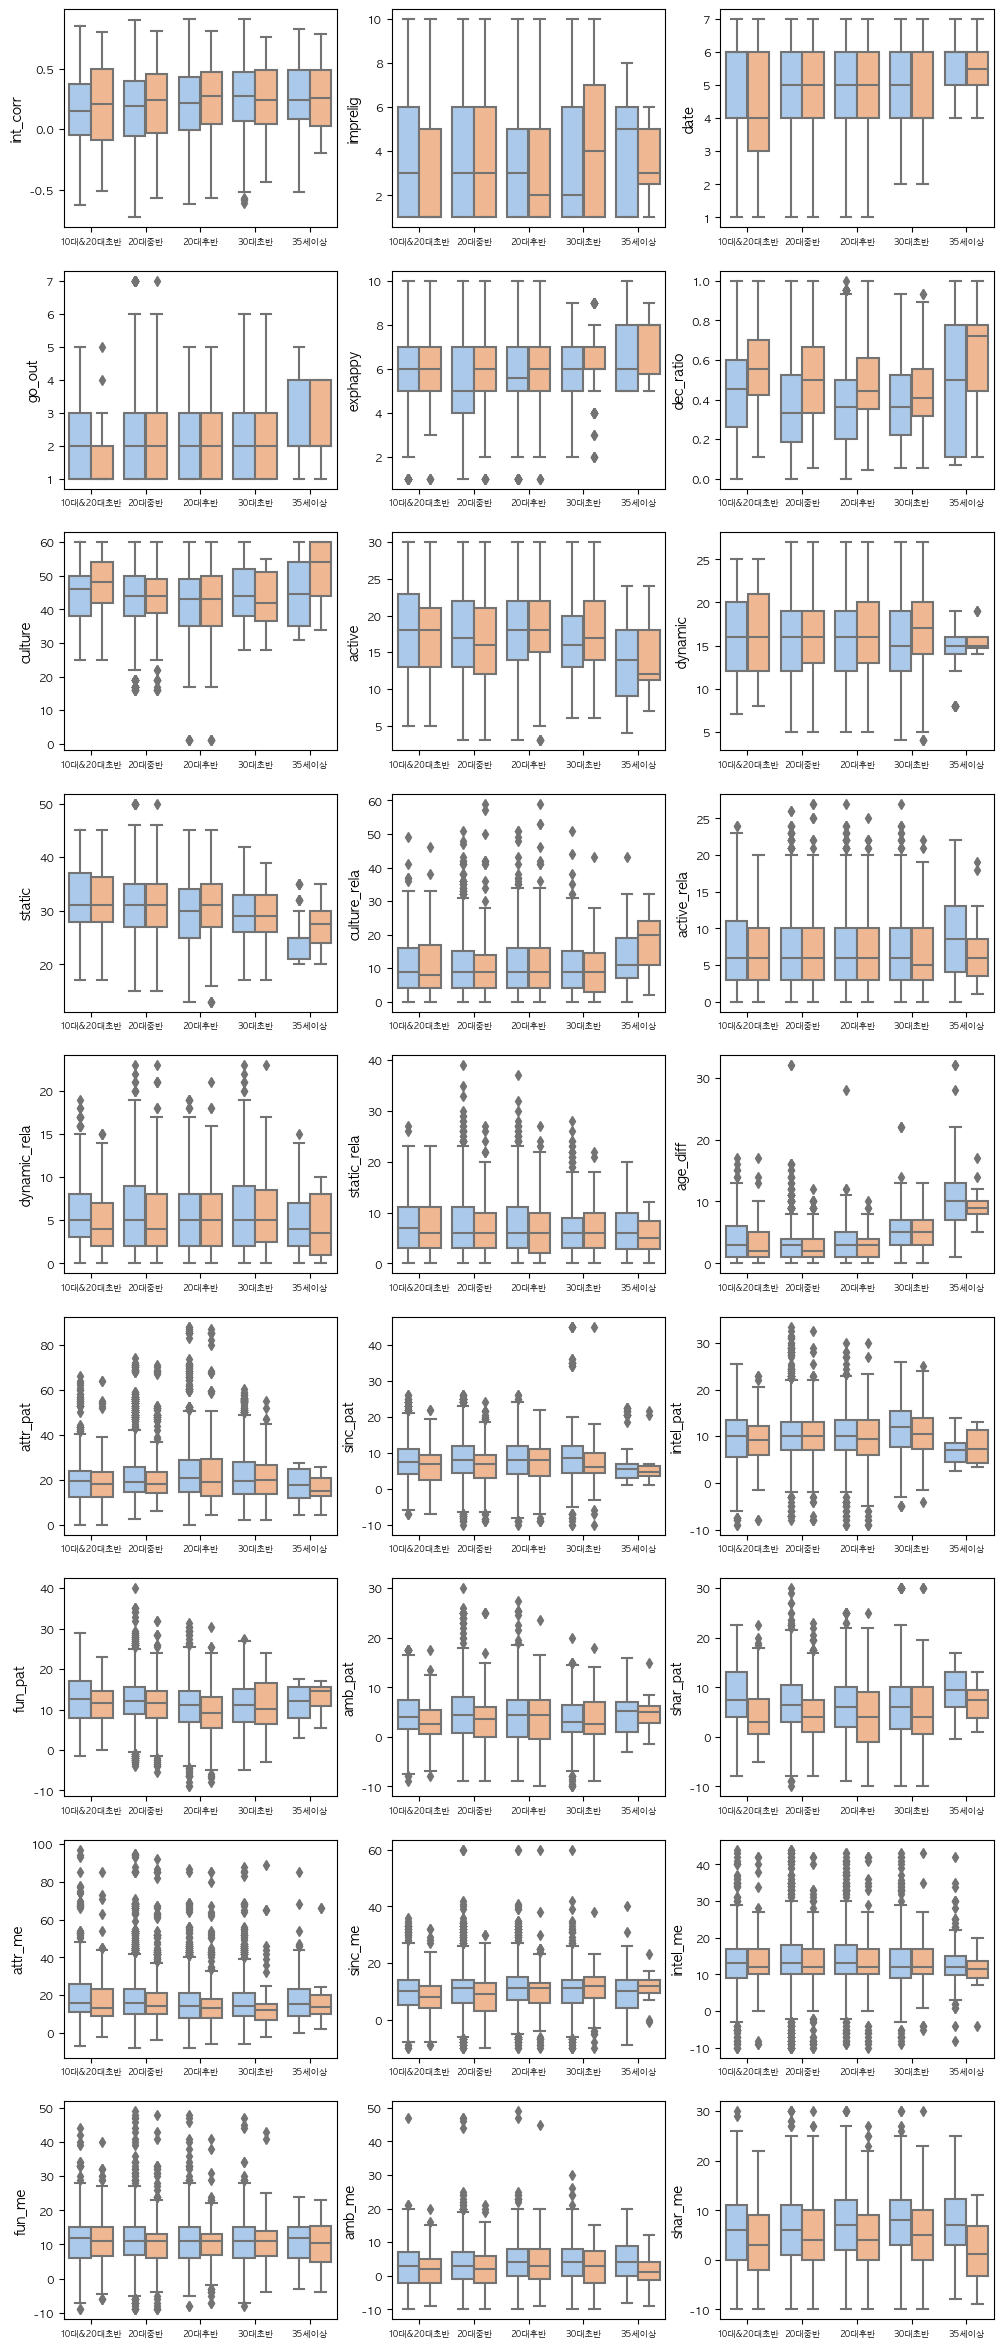

In [86]:
# 나이/매칭여부 별 분석
plt.figure(figsize = (12, 30)) 

i = 1
for col in data.columns:
    if (data[col].dtype in ['float64', 'int64']) and (col not in ['id', 'idg', 'iid', 'round', 'gender', 'position', 'order', 'partner', 'wave', 'samerace', 'dec', 'dec_o', 'career_is', 'field_is', 'pid', 'match', 'goal', 'met_o', 'age', 'zipcode_is', 'age_group', 'field_cd', 'career_c']):
        plt.subplot(9,3,i) 
        sns.boxplot(x='age_group', y=col, hue='match', data=data, palette='pastel')
        plt.xticks(fontsize = 6)
        plt.yticks(fontsize = 8)
        plt.xlabel('')
        plt.legend([], [], frameon=False)
        i += 1
        

plt.show()

In [87]:
data[data['age_group'].isin(['30대초반', '35세이상'])]

,iid,id,gender,idg,wave,round,position,order,partner,pid,...,fun_pat,amb_pat,shar_pat,attr_me,sinc_me,intel_me,fun_me,amb_me,shar_me,age_group
160,17,7.0,1,14,1,10,7,1,1,1.0,...,10.0,-0.5,0.5,8.0,14.0,13.0,11.0,9.0,8.0,30대초반
161,17,7.0,1,14,1,10,3,7,2,2.0,...,12.0,2.5,4.5,38.0,0.0,16.0,14.0,-7.0,-4.0,30대초반
162,17,7.0,1,14,1,10,9,3,3,3.0,...,11.0,2.5,3.5,27.0,1.0,25.0,3.0,3.0,-9.0,30대초반
163,17,7.0,1,14,1,10,6,10,4,4.0,...,10.0,1.5,2.5,13.0,10.0,10.0,13.0,0.0,5.0,30대초반
164,17,7.0,1,14,1,10,4,8,5,5.0,...,11.0,2.5,4.5,14.0,-1.0,17.0,20.0,5.0,9.0,30대초반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,550,20.0,1,40,21,22,14,17,18,526.0,...,24.0,4.0,0.0,5.0,5.0,25.0,17.0,3.0,13.0,30대초반
6363,550,20.0,1,40,21,22,13,16,19,527.0,...,25.0,3.0,0.0,46.0,16.0,5.0,1.0,3.0,3.0,30대초반
6364,550,20.0,1,40,21,22,19,22,20,528.0,...,24.0,4.0,-1.0,37.0,9.0,28.0,8.0,8.0,-1.0,30대초반
6365,550,20.0,1,40,21,22,3,6,21,529.0,...,27.0,2.0,2.0,6.0,20.0,20.0,6.0,6.0,17.0,30대초반


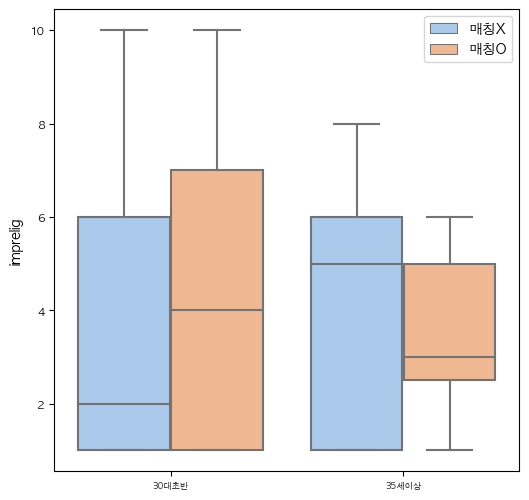

In [88]:
# 나이/매칭여부 별 분석
plt.figure(figsize = (6, 6)) 
# 데이터 필터링
filtered_data = data[data['age_group'].isin(['30대초반', '35세이상'])]

# 'match' 열의 값을 변경하여 원하는 범례 항목의 이름을 지정
filtered_data['match'] = filtered_data['match'].replace({0: '매칭X', 1: '매칭O'})

sns.boxplot(x='age_group', y='imprelig', hue='match', data=filtered_data, palette='pastel')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 8)
plt.xlabel('')
plt.legend()

plt.show()

### ✅ EDA 인사이트2 

🔍 예상과는 다르게 나이차이에 따른 매칭여부에서 차이가 없음을 확인하였다.   
🔑 꼭 나이차이가 많이 나지 않는 사람끼리 매칭시키지 않아도 된다.

🔍 30대 초반에서는 매칭이 안된 경우에서 같은 종교인 것이 중요한 정도가 매칭이 된 경우보다 낮음을 확인하였고, 
반대로 35세 이상에서는 매칭이 안된 경우에서 같은 종교인 것이 중요한 정도가 매칭이 된 경우보다 높음을 확인하였다.  

🔍 shar_me, shar_pat에서 모두 매칭이 되지 않은 경우에서 더 높은 점수에 분포함을 확인할 수 있다. 예상과는 다르게 상대와 공통점이 많다고 느껴도 이것이 꼭 매칭으로 이어지지 않음을 알 수 있다. 이는 설문조사시에 특성 요소의 모든 합을 100으로 맞춰야 하므로 다른 특성과의 상대적 점수가 원인일 수 있다.

### 가설 : 성별 별로 소개팅에서 중요하게 생각하는 요소와 성공 요소가 다를 것이다.

In [89]:
# EDA를 위해 제거했던 변수 사용
# attr1_1 - 이성을 볼때 중요하게 생각하는 것
# attr - 데이트 후 상대에 대한 응답

me_ratio = data_origin.groupby('gender').agg({'attr1_1' : 'mean', 'sinc1_1' : 'mean', 'intel1_1' : 'mean', 'fun1_1' : 'mean', 'amb1_1' : 'mean', 'shar1_1' : 'mean'}).reset_index()
# dec = 1(애프터를 하기로 결정)
pat_ratio = data_origin[data_origin['dec'] == 1].groupby('gender').agg({'attr' : 'mean', 'sinc' : 'mean', 'intel' : 'mean', 'fun' : 'mean', 'amb' : 'mean', 'shar' : 'mean'}).reset_index() 

In [90]:
me_val_fem = me_ratio.iloc[0,1:]
me_val_mal = me_ratio.iloc[1,1:]

pat_val_fem = pat_ratio.iloc[0,1:]
pat_val_mal = pat_ratio.iloc[1,1:]

categ = ['매력', '정직', '지성', '재미', '열정', '비슷함']

In [91]:
# 데이터의 시작점과 끝점을 연결
me_val_fem = [*me_val_fem, me_val_fem[0]]
me_val_mal = [*me_val_mal, me_val_mal[0]]
pat_val_fem = [*pat_val_fem, pat_val_fem[0]]
pat_val_mal = [*pat_val_mal, pat_val_mal[0]]
categ = [*categ, categ[0]]

# 각 요소의 각도
angles = np.linspace(0, 2 * np.pi, num=len(me_val_fem))

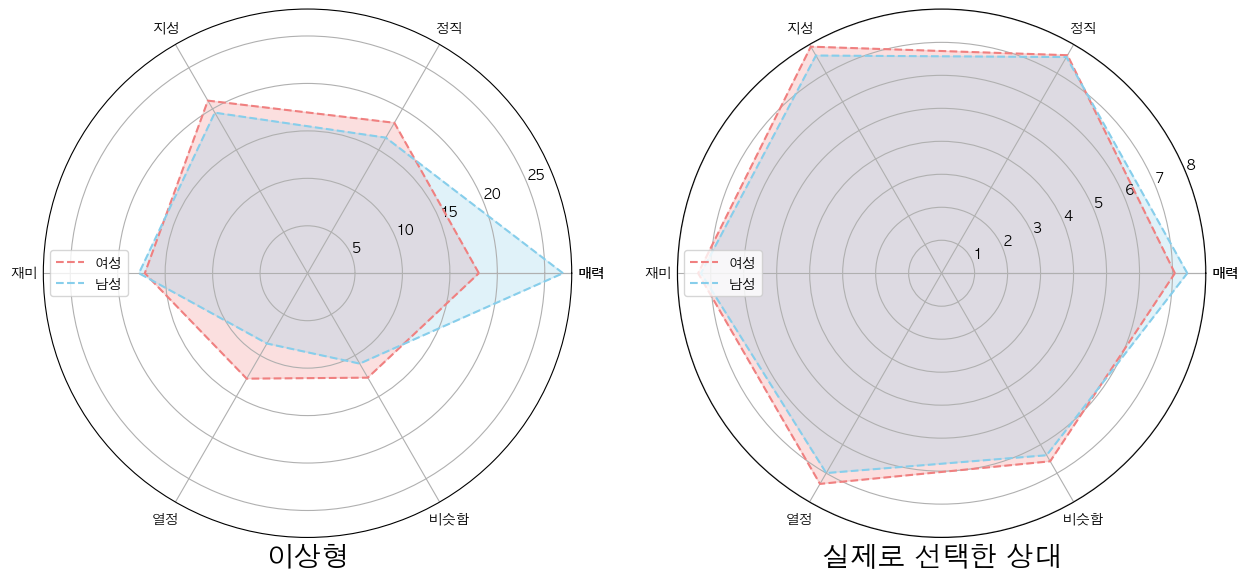

In [92]:
# 두 요소가 범위가 달라 성별끼리 비교
plt.figure(figsize = (15, 8))

ax1 = plt.subplot(1,2,1, polar=True)
plt.xticks(angles, labels = categ, fontsize = 10)
ax1.plot(angles, me_val_fem, label='여성', linestyle='dashed', color = 'lightcoral')
ax1.fill(angles, me_val_fem, color='lightcoral', alpha=0.25)
ax1.plot(angles, me_val_mal, label='남성', linestyle='dashed', color = 'skyblue')
ax1.fill(angles, me_val_mal, color='skyblue', alpha=0.25)
ax1.legend(loc='center left')

plt.xlabel('이상형', fontsize = 20)

ax2 = plt.subplot(1,2,2, polar=True)
plt.xticks(angles, labels = categ, fontsize = 10)
ax2.plot(angles, pat_val_fem, label='여성', linestyle='dashed', color = 'lightcoral')
ax2.fill(angles, pat_val_fem, color='lightcoral', alpha=0.25)
ax2.plot(angles, pat_val_mal, label='남성', linestyle='dashed', color = 'skyblue')
ax2.fill(angles, pat_val_mal, color='skyblue', alpha=0.25)
ax2.legend(loc='center left')

plt.xlabel('실제로 선택한 상대', fontsize = 20)

plt.show()

### ✅ EDA 인사이트3

🔍 이상형으로는 남성은 매력을 가장 중요하게 생각하고, 여성은 지성을 가장 중요하게 생각한다.  
🔍 실제 선택한 상대에게 여성은 열정에서 높은 점수를, 남성은 매력에서 높은 점수를 주었음을 알 수 있다.

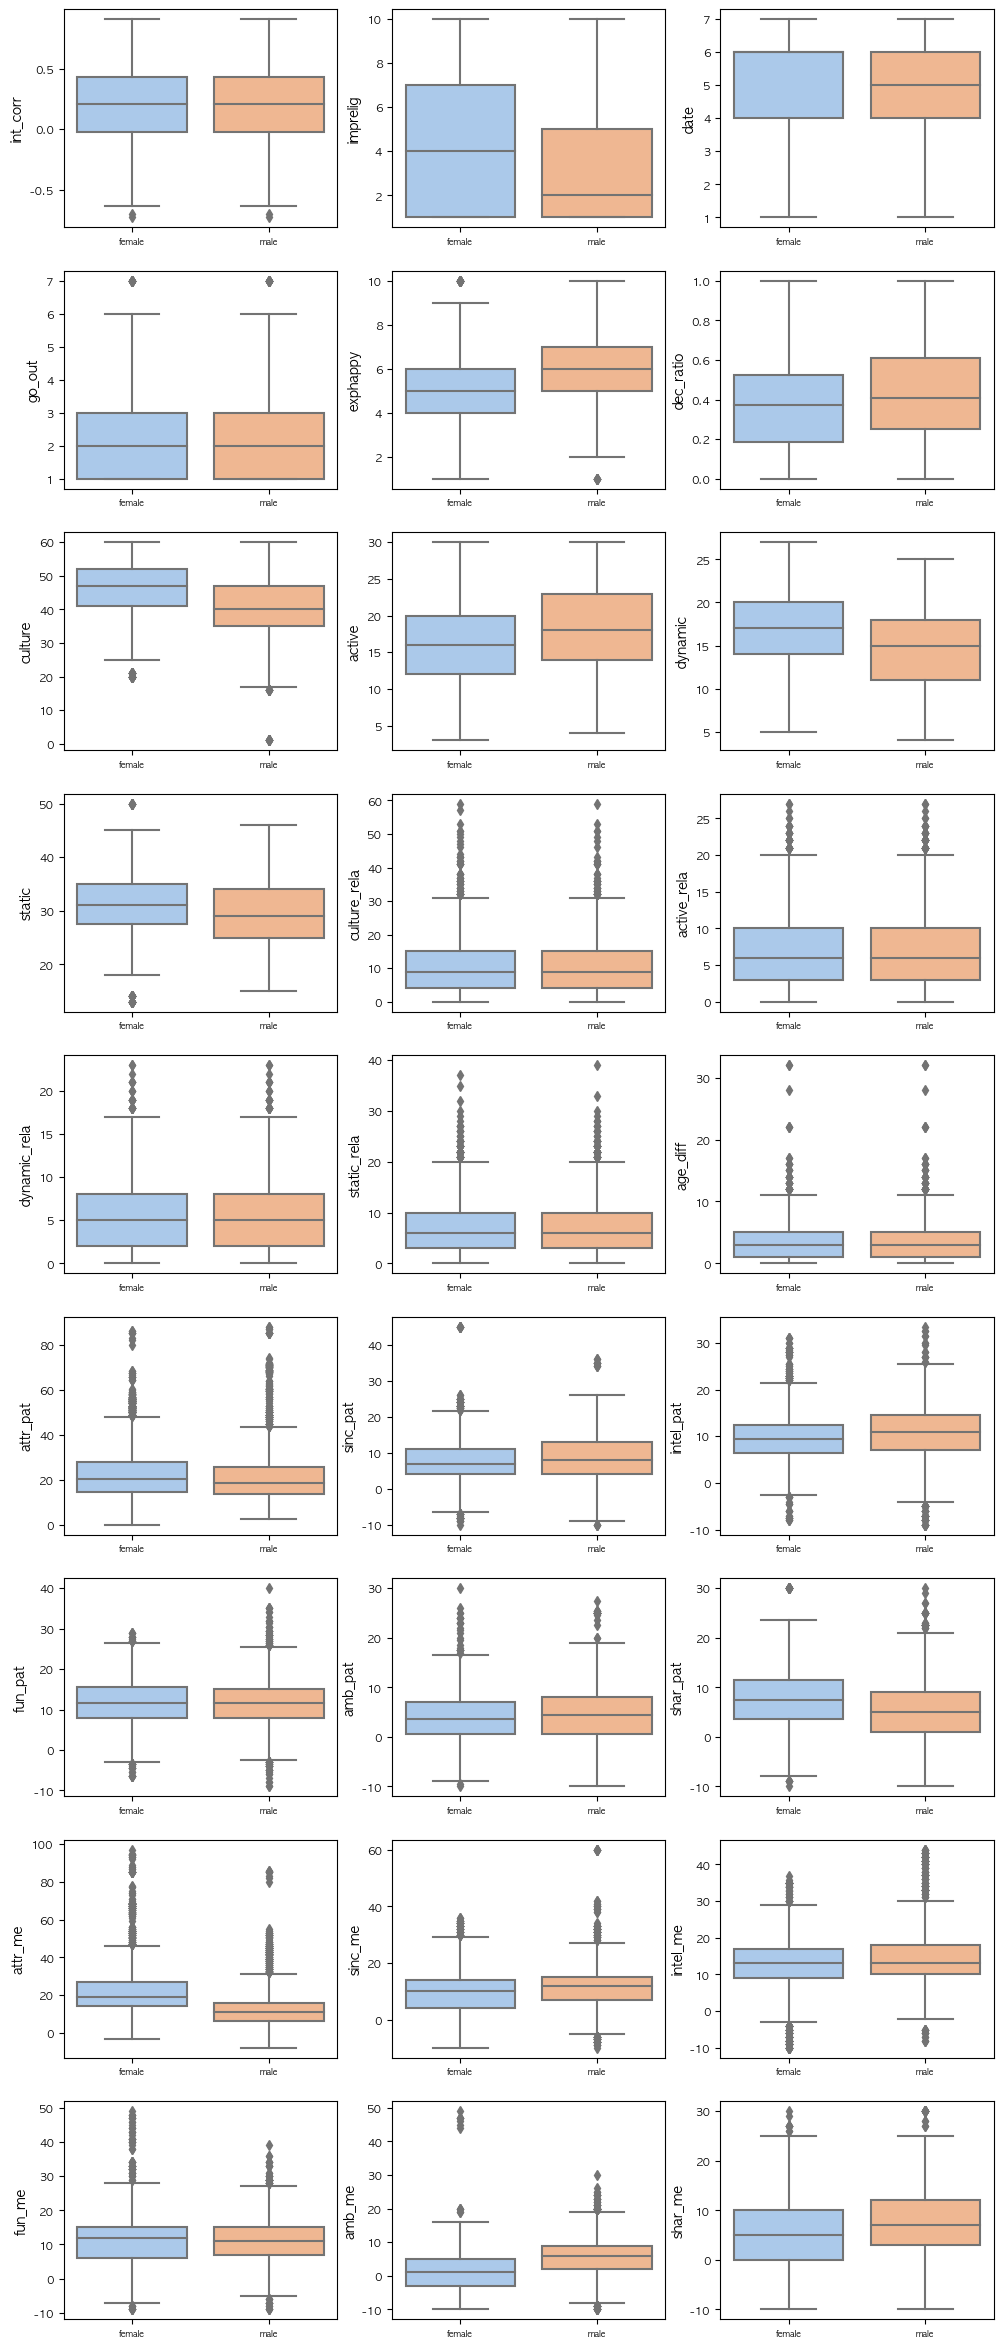

In [93]:
# 성별 별 분석

plt.figure(figsize = (12, 30)) 

i = 1
for col in data.columns:
    if (data[col].dtype in ['float64', 'int64']) and (col not in ['id', 'idg', 'iid', 'round', 'gender', 'position', 'order', 'partner', 'wave', 'samerace', 'dec', 'dec_o', 'career_is', 'field_is', 'pid', 'match', 'goal', 'met_o', 'age', 'zipcode_is', 'age_group', 'field_cd', 'career_c']):
        plt.subplot(9,3,i) 
        sns.boxplot(x='gender', y=col, data=data, palette='pastel')
        plt.xticks(fontsize = 6)
        plt.yticks(fontsize = 8)
        plt.xlabel('')
        gender_labels = ['female', 'male']
        plt.xticks(ticks=range(len(gender_labels)), labels=gender_labels)
        plt.legend([], [], frameon=False)
        i += 1
        

plt.show()

### ✅ EDA 인사이트4

🔍 남성이 여성에 비해 야망(amb_me)에 높은 점수를 받았음을, 여성이 남성에 비해 매력도(attr_me)에 높은 점수를 받았음을 확인할 수 있다.   
🔍 여성이 남성에 비해 상대적으로 종교(imprelig)가 중요하다고 생각함을 알 수 있다.  

### 가설 : 나이 차이가 클수록 소개팅 성공률이 낮을 것이다.

In [94]:
agediff_ratio = data.groupby('age_diff').agg({'match' : 'mean'}).reset_index()

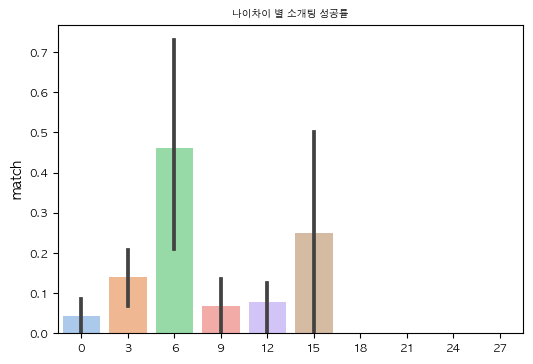

In [95]:
# 나이차이 별 소개팅 성공률
plt.figure(figsize = (6, 4)) 

plt.title('나이차이 별 소개팅 성공률', fontsize=7)
bins = list(range(0, 32, 3))
agediff_ratio['ad_group'] = pd.cut(agediff_ratio['age_diff'], bins=bins, labels=[f'{i}' for i in range(0, 30, 3)])
sns.barplot(data = agediff_ratio, x = 'ad_group', y = 'match', palette = 'pastel')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('')

plt.show()

나이차이가 많이 날때 소개팅 성공률이 낮을 것이라는 가설은 입증되지 않았다.

### 가설 : 집순이, 집돌이들의 소개팅 성공률은 낮을것이다.

In [96]:
goout_ratio = data.groupby('go_out').agg({'match' : 'mean'}).reset_index() 

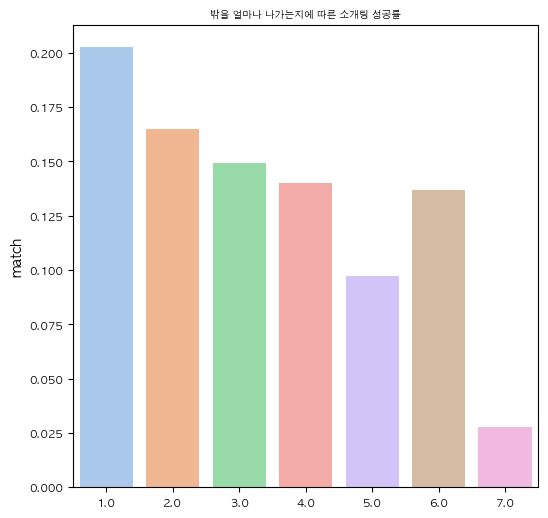

In [97]:
# 밖을 얼마나 나가는지에 따른 소개팅 성공률
plt.figure(figsize = (6, 6)) 

plt.title('밖을 얼마나 나가는지에 따른 소개팅 성공률', fontsize=7)
sns.barplot(data = goout_ratio, x = 'go_out', y = 'match', palette = 'pastel')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('')
    
plt.show()

### ✅ EDA 인사이트5

🔍 숫자가 낮을 수록 더 자주 외출하는 것을 나타내며, 7은 거의 외출하지 않음을 나타낸다. 따라서 가설이 입증되었음을 확인할 수 있다.

### 가설 : 같은 직업, 분야일수록 소개팅 성공률은 높을것이다.

In [98]:
# 같은 직업, 분야 여부에 따른 소개팅 성공률
career_ratio = data.groupby('career_is').agg({'match' : 'mean'}).reset_index()
field_ratio = data.groupby('field_is').agg({'match' : 'mean'}).reset_index()

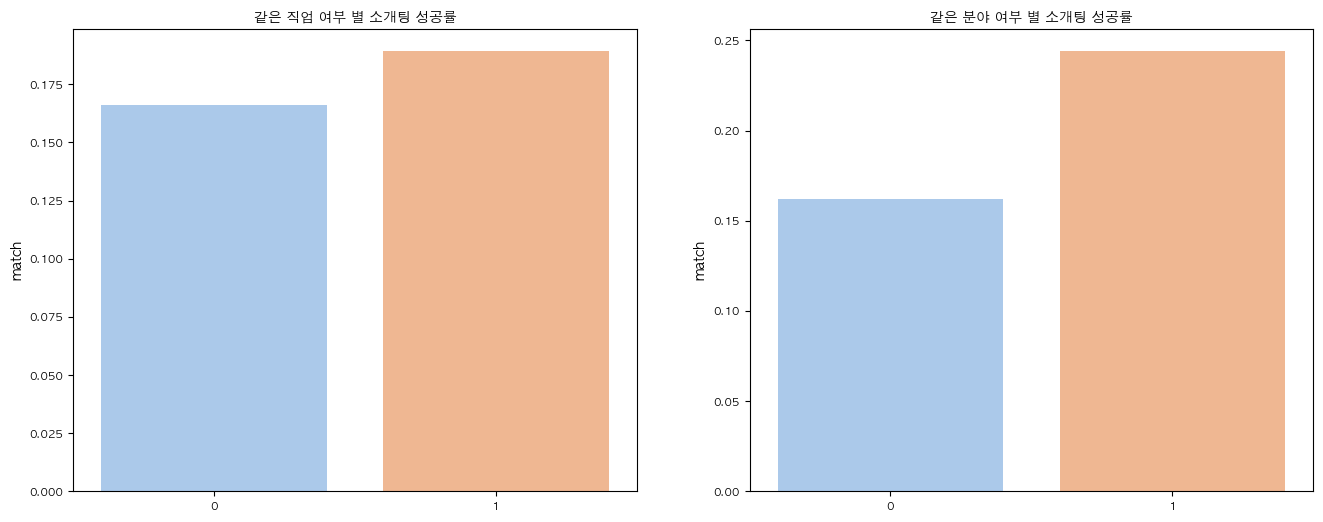

In [99]:
plt.figure(figsize = (16, 6)) 

plt.subplot(1,2,1)
plt.title('같은 직업 여부 별 소개팅 성공률', fontsize=10)
sns.barplot(data = career_ratio, x = 'career_is', y = 'match', palette = 'pastel')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('')

plt.subplot(1,2,2)
plt.title('같은 분야 여부 별 소개팅 성공률', fontsize=10)
sns.barplot(data = field_ratio, x = 'field_is', y = 'match', palette = 'pastel')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('')

plt.show()

### ✅ EDA 인사이트6

🔍 같은 직업, 분야일때 모두 소개팅 성공률이 상대적으로 높음을 확인할 수 있다. 특히, 같은 분야일 때의 소개팅 성공률의 평균이 약 0.1 더 높음을 확인할 수 있다.  
🔑 같은 분야의 사람들을 매칭한다.

In [100]:
#eda를 위해 만들어진 변수 제거
data.drop(['age_group'], axis = 1, inplace = True)
data.drop(['go_out'], axis = 1, inplace = True)
data.drop(['culture', 'active', 'dynamic', 'static'], axis = 1, inplace = True)

## Feature Selection

### feature 형 변환

In [101]:
data = data.astype({'gender':'category', 'wave':'object', 'dec_o':'category', 'match':'category', 'goal':'object', 'met_o':'category', 'zipcode_is':'category', 'career_is':'category', 'field_is':'category'}) # object형으로 바꿔줌

#### 마지막으로 소개팅 성공요인과 무관한 변수 제거 ex) id, 상대 id, dec, position 등

특히, dec와 dec_o는 상대와 애프터 여부 결정을 나타내는 변수로 각각 1일 때 target변수가 1이므로 치팅의 위험이 있다. 따라서 이를 제거하기로 하였다.

In [102]:
data.drop(['iid', 'wave', 'pid', 'id', 'idg', 'round', 'position', 'order', 'partner','dec_o', 'dec', 'dec_ratio'], axis = 1, inplace = True)

나머지 feature selection은 따로 진행하지 않고, 모델링 과정에서 진행한다.

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        6407 non-null   category
 1   match         6407 non-null   category
 2   int_corr      6407 non-null   float64 
 3   met_o         6407 non-null   category
 4   age           6407 non-null   float64 
 5   imprelig      6407 non-null   float64 
 6   goal          6407 non-null   object  
 7   date          6407 non-null   float64 
 8   exphappy      6407 non-null   float64 
 9   zipcode_is    6407 non-null   category
 10  field_is      6407 non-null   category
 11  career_is     6407 non-null   category
 12  culture_rela  6407 non-null   int64   
 13  active_rela   6407 non-null   int64   
 14  dynamic_rela  6407 non-null   int64   
 15  static_rela   6407 non-null   int64   
 16  age_diff      6407 non-null   float64 
 17  attr_pat      6407 non-null   float64 
 18  sinc_pat

소개팅 성공여부에서는 EDA에서는 도출할 수 없는 여러 요소가 함께 작용하여 결과가 달라질 것이라 생각한다. 물론 설문조사에서 얻을 수 없는 심리적인, 환경적인 요소도 함께 작용할 것이다. 이러한 모든 요소까지 담을 수 없다는 한계점을 가지고 설문조사에서 얻을 수 있는 요소들의 어떠한 작용이 소개팅에 영향을 줄지 파악하기 위하여 모델링을 진행하였다.

## 4 모델링 (모델링 성능이 좋지 않아 모델 변경 및 샘플링 방법 시도중에 있습니다.)

> **로지스틱 회귀**  
정확도 보다는 해석력에 중점을 두었기 때문에 선정하였다.

앞서 남여가 응답에 있어 차이를 보임을 확인하였고, 남여가 모델링 결과가 차이가 있다면 다른 인사이트를 얻을 수 있기에 나누어 모델링을 진행하기로 결정하였다.

추가로, 모델이 양성 클래스를 얼마나 정확히 예측하냐, 음성 클래스를 얼마나 정확히 예측하냐는 해당 프로젝트의 주요 목적이 아니므로 간단한 모델링을 진행하기로 결정하였다.

In [104]:
data_mal = data[data['gender'] == 1].reset_index(drop = True)
data_fem = data[data['gender'] == 0].reset_index(drop = True)

In [105]:
data_mal.drop(['gender'], axis = 1, inplace = True)
data_fem.drop(['gender'], axis = 1, inplace = True)

In [106]:
# 남성에 대하여 모델링

X = data_mal.drop(columns=['match']) 
y = data_mal['match']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1) #l1규제
model.fit(X_train, y_train)
# C는 모델의 복잡성을 조절 -> 작을수록 단순, 규제 강해짐 0.01~100

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [109]:
# transform
selected_indices = model.coef_[0] != 0

In [110]:
X_train_selected = X_train.loc[:, selected_indices]
X_test_selected = X_test.loc[:, selected_indices]

In [111]:
# 모델 재훈련
model.fit(X_train_selected, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [112]:
# 훈련된 모델로 테스트 데이터 예측
y_pred = model.predict(X_test_selected)

In [113]:
# 모델 평가
# 정확도
accuracy = accuracy_score(y_test, y_pred)
# 정밀도
precision = precision_score(y_test, y_pred)
# 재현율
recall = recall_score(y_test, y_pred)
# F1 score
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}')
plt.show()

Accuracy: 0.83
Precision: 0.57
Recall: 0.04
F1 Score: 0.07


In [114]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[527   3]
 [106   4]]


In [115]:
print(len(data[data['match'] == 1]))
print(len(data[data['match'] == 0]))

1088
5319


In [116]:
# 회귀식
coefficients = model.coef_[0]  # 각 독립 변수의 회귀 계수
intercept = model.intercept_[0]  # 절편

# 회귀식 출력
print("Regression Equation:")
equation = "log(p / (1 - p)) = {:.4f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + {:.4f} * x{}".format(coef, i+1)
print(equation)

Regression Equation:
log(p / (1 - p)) = 2.4578 + 0.0585 * x1 + 0.0149 * x2 + -0.0174 * x3 + -0.0169 * x4 + 0.1147 * x5 + 0.1638 * x6 + 0.0122 * x7 + 0.0014 * x8 + -0.0082 * x9 + -0.0017 * x10 + -0.0692 * x11 + -0.0517 * x12 + -0.0534 * x13 + -0.0278 * x14 + -0.0436 * x15 + -0.0488 * x16 + -0.0744 * x17 + -0.0599 * x18 + -0.0519 * x19 + -0.0436 * x20 + -0.0468 * x21 + -0.0543 * x22 + -0.0790 * x23


(추가 예정)